# Importing libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("ml-25m/ratings.csv")[:100000]

#Using only 100,000 rows since it is very computationally intensive later on
#We can up all examples later when process is finalized

In [3]:
data.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100000 non-null  int64  
 1   movieId    100000 non-null  int64  
 2   rating     100000 non-null  float64
 3   timestamp  100000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


# Pivoting data

In [5]:
df = data.pivot(index="userId", columns="movieId", values="rating")

In [6]:
df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,204692,204698,204704,205054,205072,205106,205413,205499,205557,206272
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualizing Users vs Movies Rated

In [7]:
totalMovies = df.shape[1]

In [8]:
moviesSeen = totalMovies - df.isna().sum(axis=1)
moviesSeen.describe()

count     757.000000
mean      132.100396
std       205.175858
min        20.000000
25%        35.000000
50%        64.000000
75%       148.000000
max      3212.000000
dtype: float64

Text(0.5, 1.0, 'Users vs Movies Rated')

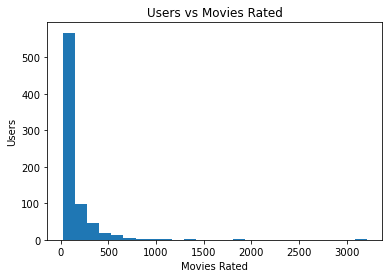

In [9]:
plt.hist(moviesSeen, bins=25)
plt.xlabel("Movies Rated")
plt.ylabel("Users")
plt.title("Users vs Movies Rated")

### Getting a better look, excluding outliers

Text(0.5, 1.0, 'Users vs Movies Rated')

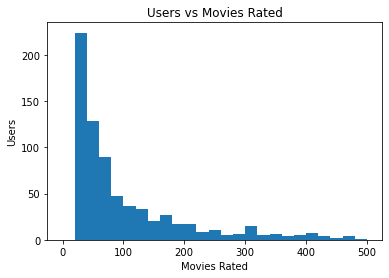

In [10]:
plt.hist(moviesSeen, bins=25, range=(0, 500))
plt.xlabel("Movies Rated")
plt.ylabel("Users")
plt.title("Users vs Movies Rated")

### Data is certainly right-skewed. We can consider removing users who don't have enough ratings. I won't remove any for now.